# Codelab MXNet (intermediate)
## Organizzato da [Italian Association for Machine Learning](http://iaml.it) e [Sourcesense](https://www.sourcesense.com)

In [0]:
# Install libraries
!apt install libnvrtc9.1
!pip install mxnet-cu92

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libnvrtc9.1
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 6,309 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 libnvrtc9.1 amd64 9.1.85-3ubuntu1 [6,309 kB]
Fetched 6,309 kB in 3s (2,198 kB/s)
Selecting previously unselected package libnvrtc9.1:amd64.
(Reading database ... 110851 files and directories currently installed.)
Preparing to unpack .../libnvrtc9.1_9.1.85-3ubuntu1_amd64.deb ...
Unpacking libnvrtc9.1:amd64 (9.1.85-3ubuntu1) ...
Setting up libnvrtc9.1:amd64 (9.1.85-3ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
    100% |████████████████████████████████| 412.1MB 42kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5c04e000 @  0x7f7255e672a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502

## Manipolazione tensori

In [0]:
# Main import
from mxnet import nd
import mxnet as mx

In [0]:
# Array creation
nd.array(((1,2,3),(4,5,6)))


[[1. 2. 3.]
 [4. 5. 6.]]
<NDArray 2x3 @cpu(0)>

In [0]:
x = nd.ones((2,3))

In [0]:
x


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [0]:
y = nd.random_uniform(-1,1,(2,3))

In [0]:
y


[[0.09762704 0.18568921 0.43037868]
 [0.6885315  0.20552671 0.71589124]]
<NDArray 2x3 @cpu(0)>

In [0]:
x = nd.full((2,3),2)

In [0]:
x


[[2. 2. 2.]
 [2. 2. 2.]]
<NDArray 2x3 @cpu(0)>

In [0]:
(y.shape,y.size,y.dtype)

((2, 3), 6, numpy.float32)

In [0]:
x * y


[[0.19525409 0.37137842 0.86075735]
 [1.377063   0.41105342 1.4317825 ]]
<NDArray 2x3 @cpu(0)>

In [0]:
y * x


[[0.19525409 0.37137842 0.86075735]
 [1.377063   0.41105342 1.4317825 ]]
<NDArray 2x3 @cpu(0)>

In [0]:
x


[[2. 2. 2.]
 [2. 2. 2.]]
<NDArray 2x3 @cpu(0)>

In [0]:
x.T


[[2. 2.]
 [2. 2.]
 [2. 2.]]
<NDArray 3x2 @cpu(0)>

In [0]:
y


[[0.09762704 0.18568921 0.43037868]
 [0.6885315  0.20552671 0.71589124]]
<NDArray 2x3 @cpu(0)>

In [0]:
y.T


[[0.09762704 0.6885315 ]
 [0.18568921 0.20552671]
 [0.43037868 0.71589124]]
<NDArray 3x2 @cpu(0)>

In [0]:
nd.dot(y,x.T)


[[1.4273899 1.4273899]
 [3.219899  3.219899 ]]
<NDArray 2x2 @cpu(0)>

In [0]:
y


[[0.09762704 0.18568921 0.43037868]
 [0.6885315  0.20552671 0.71589124]]
<NDArray 2x3 @cpu(0)>

In [0]:
y[1:2]


[[0.6885315  0.20552671 0.71589124]]
<NDArray 1x3 @cpu(0)>

In [0]:
y[:,1:2]


[[0.18568921]
 [0.20552671]]
<NDArray 2x1 @cpu(0)>

In [0]:
a =y.asnumpy()

In [0]:
a

array([[0.09762704, 0.18568921, 0.43037868],
       [0.6885315 , 0.20552671, 0.71589124]], dtype=float32)

In [0]:
nd.array(a)


[[0.09762704 0.18568921 0.43037868]
 [0.6885315  0.20552671 0.71589124]]
<NDArray 2x3 @cpu(0)>

In [0]:
ctx=mx.gpu()

In [0]:
nd.array(a).as_in_context(ctx)


[[0.09762704 0.18568921 0.43037868]
 [0.6885315  0.20552671 0.71589124]]
<NDArray 2x3 @gpu(0)>

## Gluon

In [0]:
from mxnet.gluon import nn

In [0]:
layer = nn.Dense(2)

In [0]:
layer

Dense(None -> 2, linear)

In [0]:
layer.initialize()

In [0]:
x = nd.random.uniform(-1,1,(3,4))

In [0]:
x


[[ 0.08976638  0.6945034  -0.15269041  0.24712741]
 [ 0.29178822 -0.23123658 -0.1248256  -0.40493077]
 [ 0.783546   -0.88657403  0.9273255  -0.45468742]]
<NDArray 3x4 @cpu(0)>

In [0]:
layer(x)


[[ 0.0009278  -0.00674768]
 [-0.02683341  0.00671751]
 [ 0.00798804  0.02131375]]
<NDArray 3x2 @cpu(0)>

In [0]:
layer.weight.data()


[[-0.01631819 -0.00312688  0.0408415   0.04370362]
 [ 0.00404529 -0.0028032   0.00952624 -0.01501013]]
<NDArray 2x4 @cpu(0)>

In [0]:
net = nn.Sequential()

In [0]:
net.add(nn.Conv2D(channels=5, kernel_size=4, activation='relu'))
net.add(nn.MaxPool2D(pool_size=2,strides=2))
net.add(nn.Conv2D(channels=15, kernel_size=3, activation='relu'))
net.add(nn.MaxPool2D(pool_size=2,strides=2))
net.add(nn.Dense(120,activation='relu'))
net.add(nn.Dense(60,activation='relu'))
net.add(nn.Dense(10))

In [0]:
net.summary(x)

--------------------------------------------------------------------------------
        Layer (type)                                Output Shape         Param #
               Input                              (1, 1, 28, 28)               0
        Activation-1                              (1, 5, 25, 25)               0
            Conv2D-2                              (1, 5, 25, 25)              85
         MaxPool2D-3                              (1, 5, 12, 12)               0
        Activation-4                             (1, 15, 10, 10)               0
            Conv2D-5                             (1, 15, 10, 10)             690
         MaxPool2D-6                               (1, 15, 5, 5)               0
        Activation-7                                    (1, 120)               0
             Dense-8                                    (1, 120)           45120
        Activation-9                                     (1, 60)               0
            Dense-10        

In [0]:
net.initialize(force_reinit=True)

In [0]:
x = nd.random.uniform(-1,1,(1,1,28,28))

In [0]:
y=net(x)

In [0]:
y.shape

(1, 10)

In [0]:
y


[[ 0.00111121  0.00105025 -0.00065519  0.00078372 -0.00124837  0.00077913
  -0.00426338 -0.00033932  0.0006577  -0.000106  ]]
<NDArray 1x10 @cpu(0)>

## Differenziazione automatica

In [0]:
from mxnet import autograd

In [0]:
x = nd.array(((1,2),(3,4)))

In [0]:
x


[[1. 2.]
 [3. 4.]]
<NDArray 2x2 @cpu(0)>

In [0]:
x.attach_grad()

In [0]:
with autograd.record():
  y=2*x*x

In [0]:
y.backward()

In [0]:
x.grad


[[ 4.  8.]
 [12. 16.]]
<NDArray 2x2 @cpu(0)>

In [0]:
def f(a):
  b = a*2
  while b.norm().asscalar() < 1000:
    b = b * 2
  
  if b.sum().asscalar() >=2990:
    c=b[0]
  else:
    c=b[1]
  return c

In [0]:
a = nd.random.uniform(shape=2)
a


[0.44751588 0.41748637]
<NDArray 2 @cpu(0)>

In [0]:
a.attach_grad()

In [0]:
with autograd.record():
  c=f(a)
c.backward()

In [0]:
c


[855.0121]
<NDArray 1 @cpu(0)>

In [0]:
[a.grad,c/a]

[
 [   0. 2048.]
 <NDArray 2 @cpu(0)>, 
 [1910.5737 2048.    ]
 <NDArray 2 @cpu(0)>]

In [0]:
from mxnet import nd,gpu,gluon,init,autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
import matplotlib.pyplot as plt
import time
import mxnet as mx

In [0]:
ctx = mx.gpu()

In [0]:
x = nd.ones((3,4),ctx=ctx)

In [0]:
x


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
<NDArray 3x4 @gpu(0)>

## Training sul Fashion MNIST

In [0]:
mnist_train = datasets.FashionMNIST(train=True)

In [0]:
X,y=mnist_train[0]

In [0]:
y

2

In [0]:
text_labels = ['maglietta','pantaloni','maglione','abito','giacca',
               'sandalo','maglia','scarpe','borsa','stivali']

In [0]:
X,y=mnist_train[0:10]

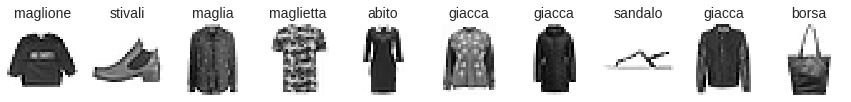

In [0]:
_,figs=plt.subplots(1,X.shape[0],figsize=(15,15))
for f,x,yi in zip(figs,X,y):
  f.imshow(x.reshape((28,28)).asnumpy())
  ax=f.axes
  ax.set_title(text_labels[int(yi)])
  ax.title.set_fontsize(14)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
  

In [0]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13,0.31)
])
mnist_train = mnist_train.transform_first(transformer)

In [0]:
batch_size=256

In [0]:
train_data = gluon.data.DataLoader(mnist_train,batch_size=batch_size,
                                  shuffle=True,num_workers=4)

In [0]:
for data,label in train_data:
  print(data.shape,label.shape)
  break

(256, 1, 28, 28) (256,)


In [0]:
mnist_valid = gluon.data.vision.FashionMNIST(train=False)
mnist_valid = mnist_valid.transform_first(transformer)
valid_data= gluon.data.DataLoader(mnist_valid,batch_size=batch_size,
                                  shuffle=False,num_workers=4)

In [0]:
def define_net():
  net = nn.Sequential()
  net.add(nn.Conv2D(channels=5, kernel_size=4, activation='relu'))
  net.add(nn.MaxPool2D(pool_size=2,strides=2))
  net.add(nn.Conv2D(channels=15, kernel_size=3, activation='relu'))
  net.add(nn.MaxPool2D(pool_size=2,strides=2))
  net.add(nn.Dense(120,activation='relu'))
  net.add(nn.Dense(60,activation='relu'))
  net.add(nn.Dense(10))
  return net
net = define_net()
net

Sequential(
  (0): Conv2D(None -> 5, kernel_size=(4, 4), stride=(1, 1))
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False)
  (2): Conv2D(None -> 15, kernel_size=(3, 3), stride=(1, 1))
  (3): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False)
  (4): Dense(None -> 120, Activation(relu))
  (5): Dense(None -> 60, Activation(relu))
  (6): Dense(None -> 10, linear)
)

In [0]:
net.initialize(init=init.Xavier(),force_reinit=True,ctx=ctx)

In [0]:
sce = gluon.loss.SoftmaxCrossEntropyLoss()

In [0]:
net.collect_params()

sequential3_ (
  Parameter conv8_weight (shape=(5, 0, 4, 4), dtype=<class 'numpy.float32'>)
  Parameter conv8_bias (shape=(5,), dtype=<class 'numpy.float32'>)
  Parameter conv9_weight (shape=(15, 0, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter conv9_bias (shape=(15,), dtype=<class 'numpy.float32'>)
  Parameter dense13_weight (shape=(120, 0), dtype=float32)
  Parameter dense13_bias (shape=(120,), dtype=float32)
  Parameter dense14_weight (shape=(60, 0), dtype=float32)
  Parameter dense14_bias (shape=(60,), dtype=float32)
  Parameter dense15_weight (shape=(10, 0), dtype=float32)
  Parameter dense15_bias (shape=(10,), dtype=float32)
)

In [0]:
trainer = gluon.Trainer(net.collect_params(),'adam')

In [0]:
def acc(output,label):
  return (output.argmax(axis=1) == 
          label.astype('float32')).mean().asscalar()

In [0]:
all_losses=[]

In [0]:
for epoch in range(10):
  train_loss,train_acc,valid_acc = 0.,0.,0.
  start =time.time()
  i = 0
  
  for data,label in train_data:
    data = data.as_in_context(ctx)
    label = label.as_in_context(ctx)
    with autograd.record():
      out = net(data)
      loss = sce(out,label)
    loss.backward()
    trainer.step(batch_size)
    cur_loss = loss.mean().asscalar()
    if i % 100 ==0:
      all_losses.append(cur_loss)
    train_loss+=cur_loss
    train_acc+=acc(out,label)
    i+=1
  for data,label in valid_data:
    data = data.as_in_context(ctx)
    label = label.as_in_context(ctx)
    valid_acc+=acc(net(data),label)
  print("Epoch %d: loss %.3f, train acc: %.3f, test acc: %.3f in %.lf sec" %
        (epoch, train_loss/len(train_data), train_acc/len(train_data),
         valid_acc/len(valid_data),time.time()-start))

Epoch 0: loss 0.663, train acc: 0.763, test acc: 0.834 in 9 sec
Epoch 1: loss 0.426, train acc: 0.846, test acc: 0.853 in 10 sec
Epoch 2: loss 0.379, train acc: 0.862, test acc: 0.865 in 10 sec
Epoch 3: loss 0.351, train acc: 0.871, test acc: 0.875 in 10 sec
Epoch 4: loss 0.332, train acc: 0.879, test acc: 0.874 in 10 sec
Epoch 5: loss 0.316, train acc: 0.882, test acc: 0.881 in 10 sec
Epoch 6: loss 0.303, train acc: 0.887, test acc: 0.877 in 10 sec
Epoch 7: loss 0.292, train acc: 0.891, test acc: 0.890 in 10 sec
Epoch 8: loss 0.282, train acc: 0.896, test acc: 0.890 in 10 sec
Epoch 9: loss 0.275, train acc: 0.898, test acc: 0.895 in 10 sec


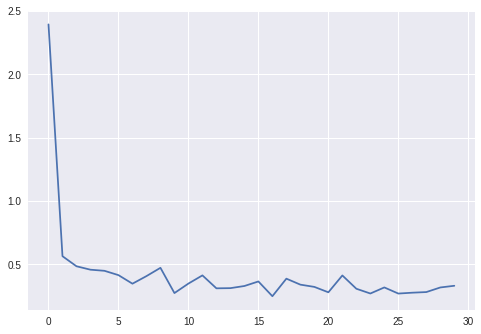

In [0]:
plt.plot(all_losses)
plt.show()

In [0]:
mnist_valid=datasets.FashionMNIST(train=False)

In [0]:
file_name = 'parametri-rete'
net.save_parameters(file_name)

another_net=define_net()
another_net.load_parameters(file_name,ctx=ctx)

In [0]:
X ,y = mnist_valid[0:10]
preds = []

for x in X:
  x = transformer(x).expand_dims(axis=0).as_in_context(ctx)
  pred = another_net(x).argmax(axis=1)
  preds.append(pred.astype('int32').asscalar())

In [0]:
preds

[0, 1, 2, 6, 3, 6, 8, 4, 5, 0]

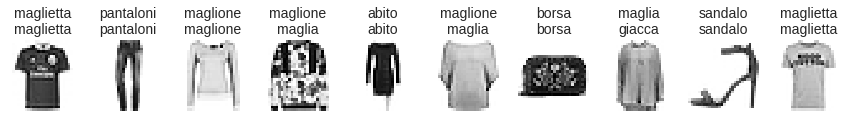

In [0]:
_,figs=plt.subplots(1,X.shape[0],figsize=(15,15))
for f,x,yi,p in zip(figs,X,y,preds):
  f.imshow(x.reshape((28,28)).asnumpy())
  ax=f.axes
  ax.set_title(text_labels[int(yi)]+"\n"+text_labels[int(p)])
  ax.title.set_fontsize(14)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
!pip install gluoncv

In [0]:
from gluoncv import model_zoo,data,utils

In [0]:
net = model_zoo.get_model('ssd_512_resnet50_v1_voc',pretrained=True)

In [0]:
file_name = utils.download('https://img2.tgcom24.mediaset.it/binary/articolo/istockphoto/47.$plit/C_2_articolo_3123450_upiImagepp.jpg?20180222143255',
                           path='gatt.jpg')


In [0]:
x,img = data.transforms.presets.ssd.load_test(file_name,short=512)

print(x.shape)

In [0]:
class_id, scores, bounding_boxes = net(x)

In [0]:
ax = utils.viz.plot_bbox(img,bounding_boxes[0],scores[0],class_id[0],
                         class_names=net.classes)
plt.show()